In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seasonal-variation-in-births/BirthMonthsData.csv


# Please UPVOTE if you like my Notebook  !! 

# Import Dependencies

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('/kaggle/input/seasonal-variation-in-births/BirthMonthsData.csv')

In [4]:
df.sample(5)

,Country or Area,Year,Area,Month,Record Type,Reliability,Number_of_Births
30258,Maldives,1987,Total,September,Data tabulated by year of occurrence,"Final figure, complete",698.0
24915,Japan,2005,Total,December,Data tabulated by year of occurrence,"Final figure, complete",87779.0
44685,Seychelles,1974,Total,October,Data tabulated by year of registration,"Final figure, complete",156.0
11499,Cuba,2003,Total,April,Data tabulated by year of occurrence,"Final figure, complete",9582.0
20630,Guernsey,1995,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",624.0


In [5]:
df.shape

(53409, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53409 entries, 0 to 53408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country or Area   53409 non-null  object 
 1   Year              53409 non-null  int64  
 2   Area              53409 non-null  object 
 3   Month             53409 non-null  object 
 4   Record Type       53409 non-null  object 
 5   Reliability       53409 non-null  object 
 6   Number_of_Births  53409 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [7]:
df['Number_of_Births'] = df['Number_of_Births'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53409 entries, 0 to 53408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country or Area   53409 non-null  object
 1   Year              53409 non-null  int64 
 2   Area              53409 non-null  object
 3   Month             53409 non-null  object
 4   Record Type       53409 non-null  object
 5   Reliability       53409 non-null  object
 6   Number_of_Births  53409 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ MB


#  Number of Birth Yearwise 

In [9]:
df.isnull().sum()

Country or Area     0
Year                0
Area                0
Month               0
Record Type         0
Reliability         0
Number_of_Births    0
dtype: int64

In [10]:
df1 = df.groupby('Year')

In [11]:
df1.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Number_of_Births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16
...,...,...,...,...,...,...,...
9100,Chile,1967,Total,February,Data tabulated by year of occurrence,"Final figure, complete",19480
9101,Chile,1967,Total,March,Data tabulated by year of occurrence,"Final figure, complete",20671
9102,Chile,1967,Total,April,Data tabulated by year of occurrence,"Final figure, complete",19172
9722,"China, Macao SAR",2021,Total,January,Data tabulated by year of occurrence,Provisional figure,399


In [12]:
df1['Number_of_Births'].sum().reset_index()

,Year,Number_of_Births
0,1967,714278
1,1968,707636
2,1969,10590583
3,1970,14888495
4,1971,18001149
5,1972,19872430
6,1973,29414049
7,1974,33641051
8,1975,31530591
9,1976,29752182


In [13]:
df2 = df1['Number_of_Births'].sum().reset_index()
df2.columns = ['Year','Total_Birth']


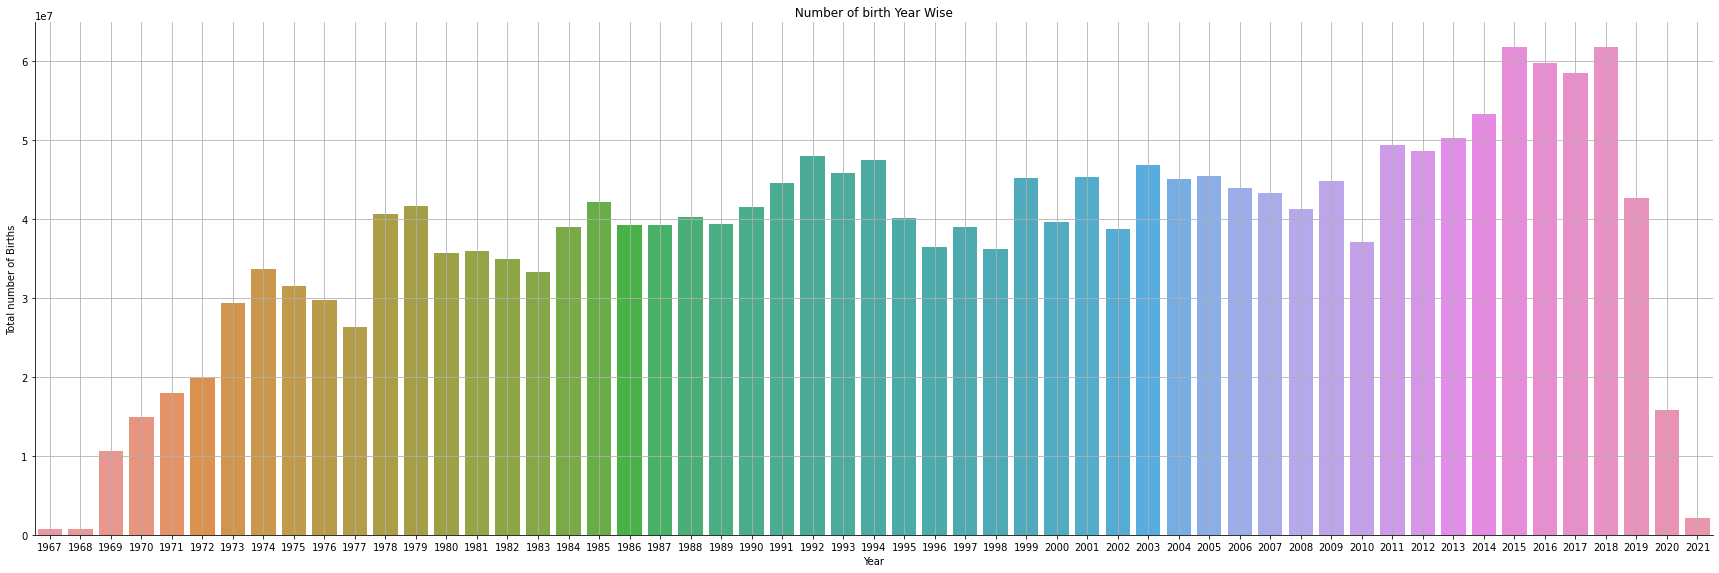

In [14]:
ax=sns.catplot(x = "Year", y="Total_Birth", kind ='bar', data =df2, height = 8 , aspect = 3,legend = True)

plt.title(" Number of birth Year Wise ")
plt.xlabel('Year')
plt.ylabel('Total number of Births')



plt.grid(True)

# Data Cleaning

In [15]:
df['Month'].value_counts()

Total                 4072
January               4072
April                 4068
March                 4062
May                   4056
February              4054
July                  4051
June                  4047
October               4041
September             4038
August                4037
November              4031
December              4024
Unknown                491
January - March         72
April - June            65
July - September        64
October - December      64
Name: Month, dtype: int64

In [16]:
df1 = df

In [17]:
df1 = df1.drop(df1[df1['Month'] == 'Total'].index)


In [18]:
df1 = df1.drop(df1[df1['Month'] == 'January - March'].index)
df1 = df1.drop(df1[df1['Month'] == 'April - June'].index)
df1 = df1.drop(df1[df1['Month'] == 'July - September'].index)
df1 = df1.drop(df1[df1['Month'] == 'October - December'].index)
df1 = df1.drop(df1[df1['Month'] == 'Unknown'].index)

In [19]:
df1 = df1.drop(df1[df1['Record Type'] == 'Vital statistics from census'].index)

# Month-wise Record Type 

In [20]:
df['Record Type'].value_counts()

Data tabulated by year of occurrence      46129
Data tabulated by year of registration     7267
Vital statistics from census                 13
Name: Record Type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


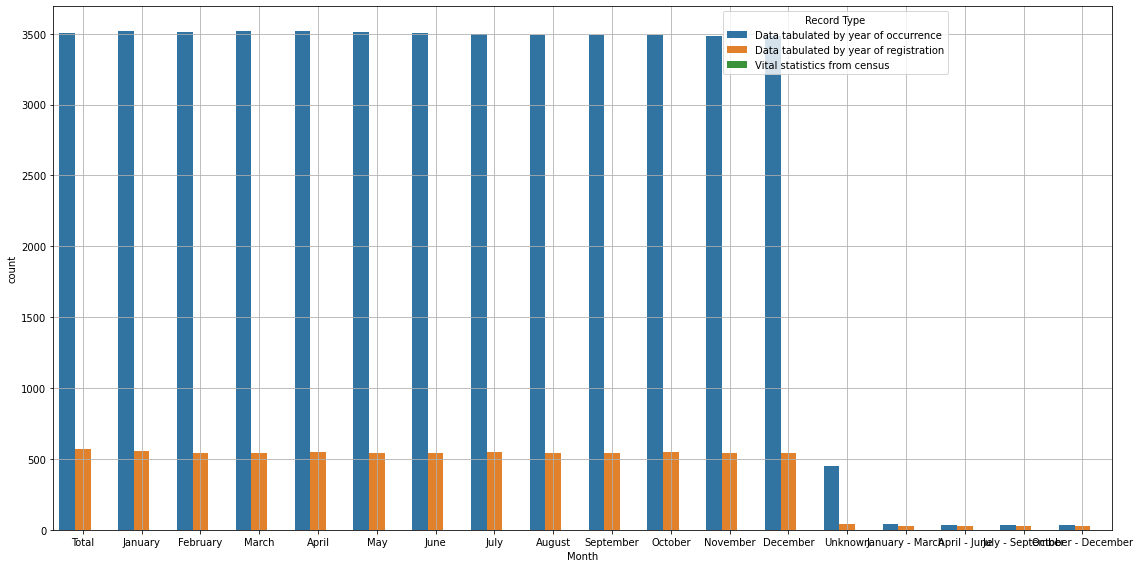

In [21]:
plt.figure(figsize= (16,8))
sns.countplot(df['Month'], hue = df['Record Type'])
plt.tight_layout()
plt.legend( 
          title ="Record Type",
         
          bbox_to_anchor =(0.85, 0,0, 1))
plt.grid(True)
plt.show()

# Top 25 Country with maximun number of Birth

In [22]:
raw_company_list = df["Country or Area"].value_counts()[0:25].reset_index()
company_list = raw_company_list['index'].values.tolist()
data = df[df['Country or Area'].isin(company_list)]

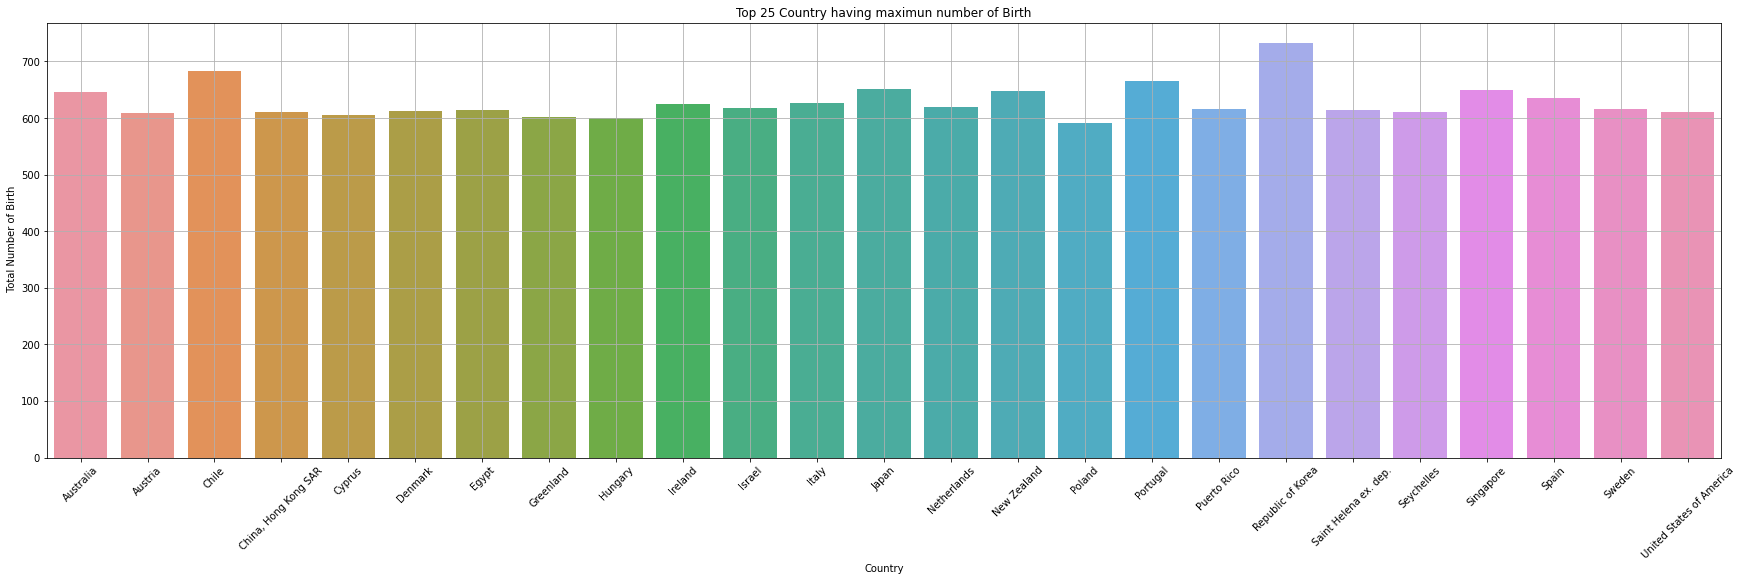

In [23]:
plt.figure(figsize = (30,8))
sns.countplot(data = data, x = 'Country or Area')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel(" Total Number of Birth")
plt.title('Top 25 Country having maximun number of Birth')
plt.show()

# Reliability Distribution

In [24]:
df1= df['Reliability'].value_counts()

In [25]:
df['Reliability'].value_counts()

Final figure, complete    50837
Provisional figure         2026
Other estimate              546
Name: Reliability, dtype: int64

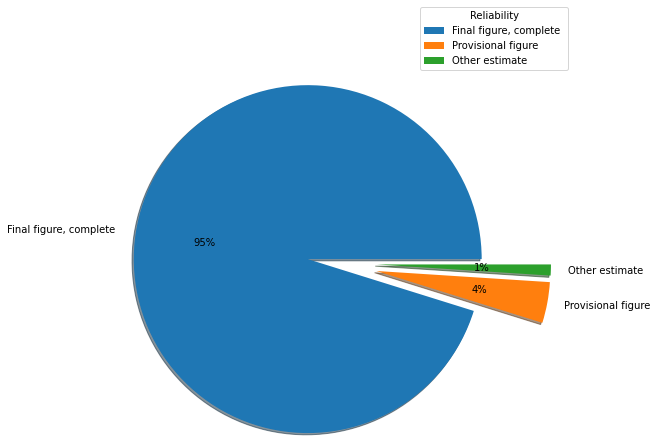

In [26]:
plt.pie(df1,autopct='%.0f%%',labels=['Final figure, complete ', 'Provisional figure','Other estimate'],radius=2,explode = (0.3,0.5, 0.5),shadow=True)
plt.legend( 
          title ="Reliability",
         
          bbox_to_anchor =(1, 0.7,0.6, 1))
plt.show()

# Thank you !!¶
Please upvote if you liked my work :):)